In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import csv
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import spacy
from bs4 import BeautifulSoup
import time

In [76]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
file_1 = "/content/gdrive/My Drive/data/data.csv"

In [78]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
print(stopWords)

also_remove = ['  ' , '.' , '..' , '...' , '[' , ']', '}', '{', '(' , ')' ,',']

{'his', 'all', 'ourselves', 'wasn', 'or', 'with', 'as', 'i', 'to', 'yourselves', 'both', 'ma', 'shouldn', "wouldn't", "should've", 'from', 'yourself', 'why', 'other', 'these', 'd', 'they', "won't", "hadn't", 'then', 'not', 'been', 'themselves', 'of', 'be', 'has', 'most', 'during', 'you', 'your', 'her', 'more', 'he', 'does', 'wouldn', 'against', 'very', 'll', 'being', 'the', 'and', 'an', "wasn't", 'until', 'aren', 'didn', 'because', 'how', "mustn't", 'hadn', 'its', 'doesn', 'once', "isn't", 'was', 'when', 'hasn', 'so', 'who', 'this', 'will', 'nor', "aren't", 'over', 'here', 't', 'o', 'weren', 'theirs', 'while', 'do', 'those', "hasn't", 'again', 'mustn', 'couldn', "you'd", 'itself', 'too', 'me', 'our', "haven't", 've', "didn't", "couldn't", 'that', 'is', 'into', 'any', 'y', 'by', "shouldn't", 'some', "you've", 'on', 'off', 'him', 'have', 'having', 'for', 'at', 'hers', 'through', 'after', "weren't", 'it', 'what', 'had', 're', 'did', 'under', 'should', 'up', 'such', 'no', 'only', 'ours', '

In [79]:
reviews = []
labels = []

start_time = time.time()

with open(file_1 , 'r') as csvfile:
  reader = csv.reader(csvfile , delimiter = ',')
  next(reader)
  for row in reader:
    if row[1] == "positive": labels.append(1)
    if row[1] == "negative" : labels.append(0)
    # labels.append(row[1])
    review = row[0].lower()
    BeautifulSoup(review, "lxml")                                               #remove html tags
    review = review.replace('[^\w\s]','')                                       #remove puntuations
    review = review.replace("<br /><br />"," ")                                 #remove particular tags
    review = "".join([i for i in review if not i.isdigit()])                    #remove_digits
    for word in stopWords:                                                      #remove stopwords
      stopword = " " + word + " "
      review = review.replace(stopword , " ")
    for i in also_remove:
      review = review.replace(i,"")
    reviews.append(review)

print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')

Time taken : 0.70 mins


In [80]:
print("review : ",reviews[0])

review :  one reviewers mentioned watchingoz episode hooked right exactly happened me first thing struck oz brutality unflinching scenes violence set right word go trust me show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz mess around first episode ever saw struck nasty surreal say ready it watched more developed taste oz got accustomed high levels graphic violence violence injustice crooked guards who'll sold nickel inmates who'll kill order get away it well mannered middle class inmates

In [0]:
#  stemming and lemmatization

# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer

# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

# lemmatizer = WordNetLemmatizer()

# wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV} # Pos tag, used Noun, Verb, Adjective and Adverb

# for review in reviews:
#   pos_tagged_text = nltk.pos_tag(review.split())
#   review = " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [82]:
max_len = 0

for review in reviews:
  length = len(review)
  if length>max_len : max_len = length

print("max_len :",max_len)
print("total reviews: ", len(reviews))

max_len : 9452
total reviews:  50000


In [0]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
oov_tok = "<OOV>"
vocab_size = 10000
max_len = 200

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(reviews[:4000])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(reviews[:3000])
padded = pad_sequences(sequences,maxlen=200, truncating="post")

In [84]:
padded = padded[:4000]
print(padded[0])
            

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    4 1682  839    1  332 2382  114  576
  611  143   19   61 2628 2532 8127    1   54  462  177  114  434   53
 1827  143   46 8128 1861    1   46 2199 5754 4306 1118  312  462 3201
  264  246  434  323 2532    1  248    1 3739 2707 1199    1 2902 1133
    1  493 5380 4102 1101 5057 3593 7358  302    1    1  199 5058 9218
  493  219    1 4782    1    1 7359 6726 2200    1    1  280 5059 5755
 6727    1    1   33  135  142    9   52  178 1255   46  592  101  169
  181 2629  704   82 1290 4534 2630  984  704 1498  704    1  891   87
   19  332   45  126 2628 1272 2082   52 1441    7  193  556 1340 1200
 2532   91 5756  199 2036 1942  462  462 8129 6193 4535    1 2708    1
 8130    1  438  568   16  142    7   14 8131  580  605 8130  606 1101
    1  592  420  937 2533 1101  421   58 2532  102  337 2534 3081    1
   16 

In [0]:
training_set = []

for row in range(padded.shape[0]):
  train = []
  for col in range(padded.shape[1]):
    train.append(padded[row][col])
  training_set.append(train)

In [86]:
padded_train = training_set[:4000]
padded_test = training_set[2000:3000]
print(type(training_set))
print(training_set[0])

<class 'list'>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1682, 839, 1, 332, 2382, 114, 576, 611, 143, 19, 61, 2628, 2532, 8127, 1, 54, 462, 177, 114, 434, 53, 1827, 143, 46, 8128, 1861, 1, 46, 2199, 5754, 4306, 1118, 312, 462, 3201, 264, 246, 434, 323, 2532, 1, 248, 1, 3739, 2707, 1199, 1, 2902, 1133, 1, 493, 5380, 4102, 1101, 5057, 3593, 7358, 302, 1, 1, 199, 5058, 9218, 493, 219, 1, 4782, 1, 1, 7359, 6726, 2200, 1, 1, 280, 5059, 5755, 6727, 1, 1, 33, 135, 142, 9, 52, 178, 1255, 46, 592, 101, 169, 181, 2629, 704, 82, 1290, 4534, 2630, 984, 704, 1498, 704, 1, 891, 87, 19, 332, 45, 126, 2628, 1272, 2082, 52, 1441, 7, 193, 556, 1340, 1200, 2532, 91, 5756, 199, 2036, 1942, 462, 462, 8129, 6193, 4535, 1, 2708, 1, 8130, 1, 438, 568, 16, 142, 7, 14, 8131, 580, 605, 8130, 606, 1101, 1, 592, 420, 937, 2533, 1101, 421, 58, 2532, 102, 337, 2534, 3081, 1, 16, 1167, 4307, 446]


In [0]:
#CBOW_MODEL
context_word = []
target_word = []



window_size = 1

for sentence in padded_train:
  for i,word in enumerate(sentence):
    

    if i- window_size >= 0 and i+ window_size < len(sentence):
      # w = np.zeros((vocab_size+1,1))
      # w[word] = 1
      target_word.append(word)
      context = []

      for j in range(i-window_size ,i+window_size +1):
        if j!= i: 
          # w = np.zeros((vocab_size+1,1))
          # w[sentence[j]] = 1
          context.append(sentence[j])

      context_word.append(context)

    

In [0]:
test_context_word = []
test_target_word = []

window_size = 2

for sentence in padded_test:
  for i,word in enumerate(sentence):
    # w = np.zeros((vocab_size+1,1))
    # w[word] = 1
    test_target_word.append(word)
    test_context = []

    if i- window_size >= 0 and i+ window_size < len(sentence):

      for j in range(i-window_size ,i+window_size +1):
        if j!= i: 

          # w = np.zeros((vocab_size+1,1))
          # w[sentence[j]] = 1
          test_context.append(sentence[j])

      test_context_word.append(context)

In [89]:
len(test_context_word)

196000

In [90]:
type(test_target_word[0])

numpy.int32

In [94]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding , Dense
from keras.losses import SparseCategoricalCrossentropy
embedding_dim = 32
max_length = 2
model = tf.keras.Sequential([
         tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
         tf.keras.layers.Flatten(),     
         tf.keras.layers.Dense(vocab_size, activation='softmax')
         ])

model.compile(loss="SparseCategoricalCrossentropy",optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 2, 32)             320000    
_________________________________________________________________
flatten_6 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10000)             650000    
Total params: 970,000
Trainable params: 970,000
Non-trainable params: 0
_________________________________________________________________


In [0]:
context_word = np.array(context_word)
target_word = np.array(target_word)
test_context_word = np.array(test_context_word)
test_target_word = np.array(test_target_word)

In [99]:
num_epochs = 5
MODEL = model.fit(context_word , target_word , epochs=num_epochs)

Epoch 1/5
  565/18563 [..............................] - ETA: 4:12 - loss: 3.2542 - accuracy: 0.5338

KeyboardInterrupt: ignored

Text(0.5, 1.0, 'accuray vs epochs')

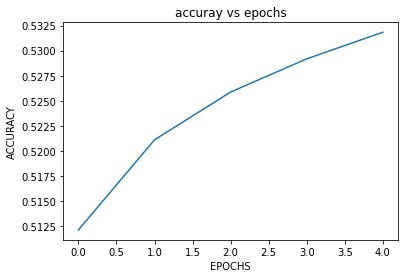

In [100]:
import matplotlib.pyplot as plt

plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.plot(MODEL.history["accuracy"])
# plt.plot(MODEL.history["val_accuracy"])
# plt.legend(['accuracy','val_accuracy'])
plt.title("accuray vs epochs")


Text(0.5, 1.0, 'loss  vs epochs')

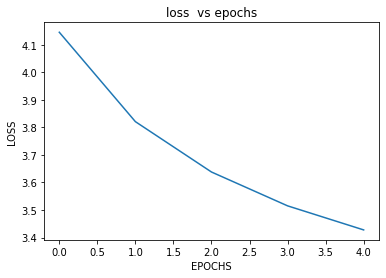

In [101]:

plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.plot(MODEL.history["loss"])
# plt.plot(MODEL.history["val_loss"])
# plt.legend(["loss","val_loss"])
plt.title("loss  vs epochs")

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [103]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 32)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [0]:
def cosine_similarity(u, v): 
    distance = 0.0
    dot = np.dot(u,v.T)

    norm_u = np.sqrt(np.dot(u,u.T))
    norm_v = np.sqrt(np.dot(v,v.T))
    cosine_similarity = dot/(norm_u*norm_v)
    
    return cosine_similarity

In [113]:
father = weights[word_index["father"],:]
mother = weights[word_index["mother"],:]
ball = weights[word_index["ball"],:]
crocodile = weights[word_index["crocodile"],:]
france = weights[word_index["france"],:]
italy = weights[word_index["italy"],:]
paris = weights[word_index["paris"],:]
rome = weights[word_index["rome"],:]

print("cosine_similarity(father, mother) = ", cosine_similarity(father, mother))
print("cosine_similarity(ball, crocodile) = ",cosine_similarity(ball, crocodile))
print("cosine_similarity(france - paris, rome - italy) = ",cosine_similarity(france - paris, rome - italy))

cosine_similarity(father, mother) =  0.6104168
cosine_similarity(ball, crocodile) =  0.40503135
cosine_similarity(france - paris, rome - italy) =  -0.034147024


In [0]:
# GRADED FUNCTION: complete_analogy

def complete_analogy(word_a, word_b, word_c, word_to_vec_map):
    """
    Performs the word analogy task as explained above: a is to b as c is to ____. 
    
    Arguments:
    word_a -- a word, string
    word_b -- a word, string
    word_c -- a word, string
    word_to_vec_map -- dictionary that maps words to their corresponding vectors. 
    
    Returns:
    best_word --  the word such that v_b - v_a is close to v_best_word - v_c, as measured by cosine similarity
    """
    
    # convert words to lowercase
    word_a, word_b, word_c = word_a.lower(), word_b.lower(), word_c.lower()
    
    ### START CODE HERE ###
    # Get the word embeddings e_a, e_b and e_c (≈1-3 lines)
    e_a, e_b, e_c = weights[word_index[word_a],:] , weights[word_index[word_b],:] , weights[word_index[word_c],:]
    ### END CODE HERE ###
    
    words = word_index.keys()
    max_cosine_sim = -100              # Initialize max_cosine_sim to a large negative number
    best_word = None                   # Initialize best_word with None, it will help keep track of the word to output

    # to avoid best_word being one of the input words, skip the input words
    # place the input words in a set for faster searching than a list
    # We will re-use this set of input words inside the for-loop
    input_words_set = set([word_a, word_b, word_c])
    
    # loop over the whole word vector set
    for w in words:        
        # to avoid best_word being one of the input words, skip the input words
        if w in input_words_set:
            continue
        if word_index[w] >= 10000:
          continue
        
        ### START CODE HERE ###
        # Compute cosine similarity between the vector (e_b - e_a) and the vector ((w's vector representation) - e_c)  (≈1 line)
        cosine_sim = cosine_similarity(e_b-e_a,weights[word_index[w],:]-e_c)
        
        # If the cosine_sim is more than the max_cosine_sim seen so far,
            # then: set the new max_cosine_sim to the current cosine_sim and the best_word to the current word (≈3 lines)
        if cosine_sim > max_cosine_sim:
            max_cosine_sim = cosine_sim
            best_word = w
        ### END CODE HERE ###
        
    return best_word

In [134]:
triads_to_try = [('italy', 'italian', 'spain'), ('india', 'mumbai', 'japan'), ('man', 'woman', 'boy'), ('small', 'smaller', 'large')]
for triad in triads_to_try:
    print ('{} -> {} :: {} -> {}'.format( *triad, complete_analogy(*triad,word_index)))

italy -> italian :: spain -> silent
india -> mumbai :: japan -> values
man -> woman :: boy -> twists
small -> smaller :: large -> there
